In [12]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [13]:
# We are reading our data
df = pd.read_csv("heart_unsorted2.csv")

In [14]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [15]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.885


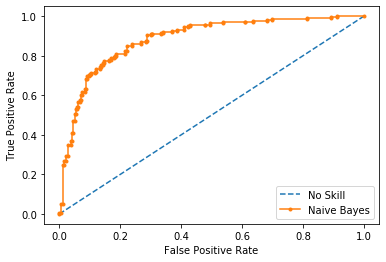

In [18]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = GaussianNB()
model.fit(trainX, trainy)
# predict probabilities
nb_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
nb_probs = nb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
nb_auc = roc_auc_score(testy, nb_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(testy, nb_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
